#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 1</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

unknownmagnitude1 = 5
unknownmagnitude2 = 5
unknownmagnitude3 = 15
unknownmagnitude4 = 22
unknownmagnitude5 = 3
unknownphase5 = np.pi/4

## <font color=red>DSP.05.G1) Multiplying Sine Waves of the Same Frequency but Different Phase</font>

### <font color=red>DSP.05.G1.a) A Short Review</font>

Run the code to multiply two 12 Hz sine waves.

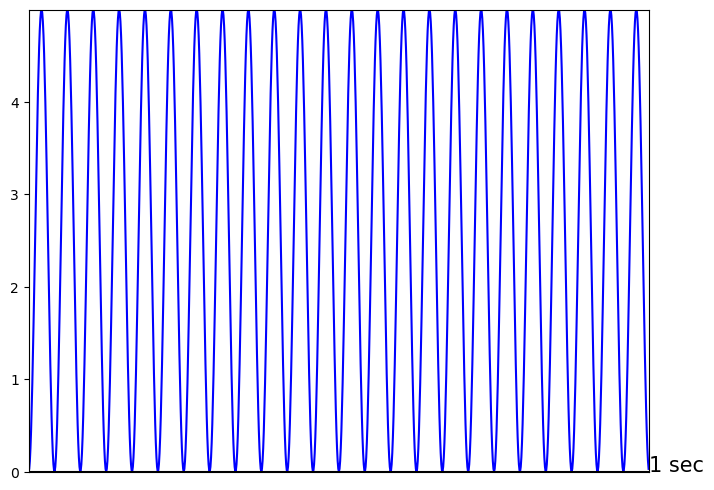

In [2]:
time = np.arange(0,1,0.001)
freq = 12
timeseries = unknownmagnitude1 * np.sin(2*np.pi * freq * time) * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 12 Hz activity. Also, what is the DC offset?

### <font color=red>DSP.05.G1.b) Multiplying Sine Waves of the Same Frequency but Different Phase</font>

Build on the previous example. This time one of the signals has a 45-degree phase shift. So, the two signals are identical in frequency but now differ in phase. 

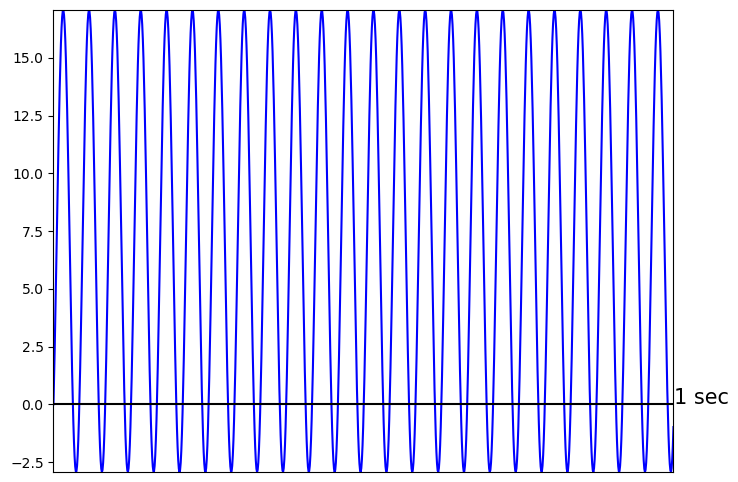

In [4]:
time = np.arange(0,1,0.001)
freq = 12
timeseries = unknownmagnitude2 * np.sin(2*np.pi * freq * time + np.pi/4) * np.sin(2*np.pi * freq * time)
make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 12 Hz activity. Specifically, modify the code so the 'probe' sine wave with
unity gain has the needed phase shift.

### <font color=red>DSP.05.G1.c) An Alternative Way to Compute the Magnitude</font>

Here is a 15 Hz timeseries.

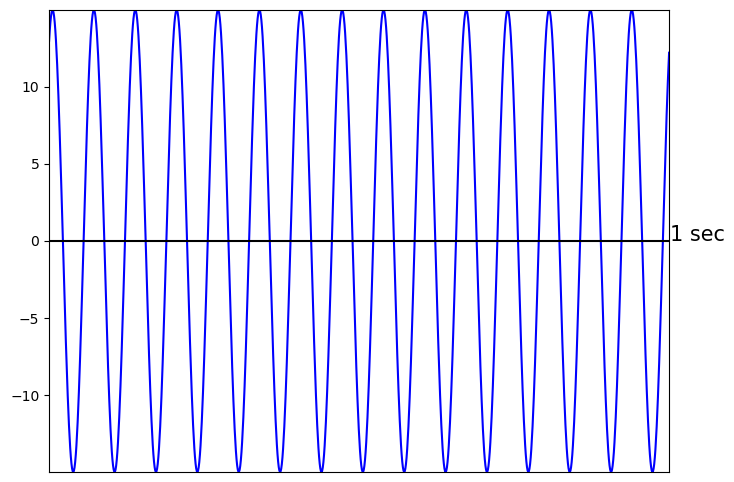

In [5]:
time = np.arange(0,1,0.001)
freq = 15
timeseries = unknownmagnitude3 * np.sin(2*np.pi * freq * time + np.pi/3) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 15 Hz activity using sine and cosine functions. Hint: Recall this trigonometric
identity: $sin^2 θ + cos^2 θ$ = 1.

### <font color=red>DSP.05.G1.d) An Alternative Way to Compute the Magnitude - a Second Example</font>

Here is a new sine timeseries with a phase offset.

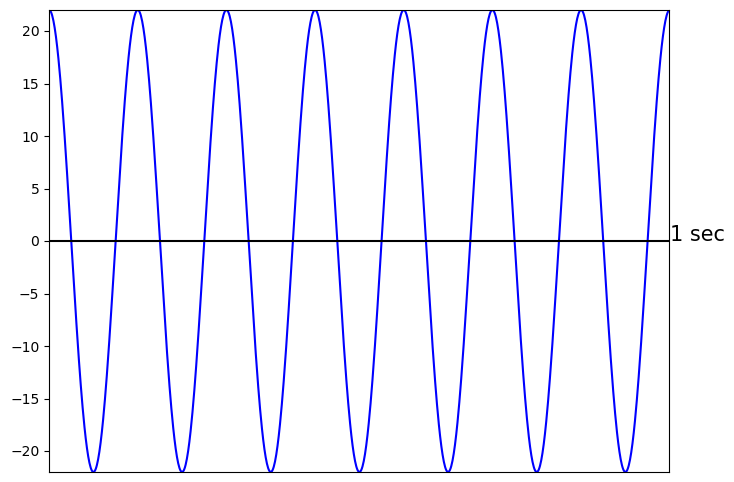

In [6]:
time = np.arange(0,1,0.001)
freq = 7
timeseries = unknownmagnitude4 * np.sin(2*np.pi * freq * time + np.pi/2) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude of 7 Hz activity using sine and cosine functions. Hint: Recall this trigonometric
identity: $sin^2 θ + cos^2 θ$ = 1.

### <font color=red>DSP.05.G1.e) Calculuate the Phase</font>

Stay with the example above.

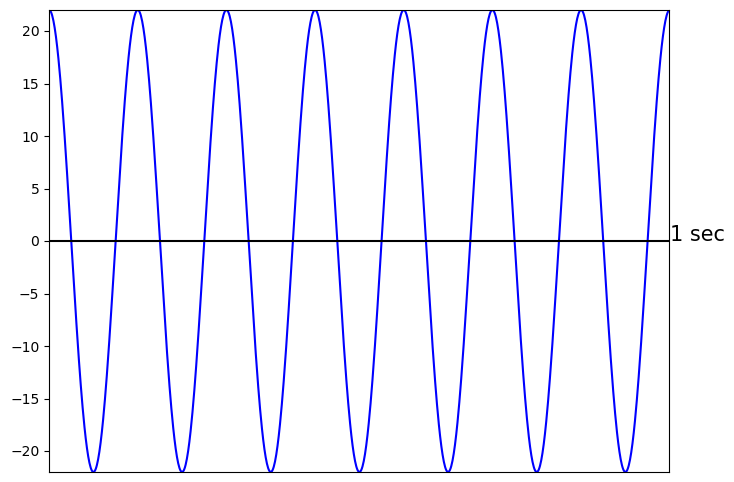

In [7]:
time = np.arange(0,1,0.001)
freq = 7
timeseries = unknownmagnitude4 * np.sin(2*np.pi * freq * time + np.pi/2) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Measure the phase of the timeseries. Report the phase answer in radians and in degrees.

### <font color=red>DSP.05.G1.f) Calculate the Magnitude and Phase</font>

Plot this timeseries composed of an 8 Hz sine wave of unknown magnitude and phase. Obtain a
measure of the magnitude and phase of the 8 Hz activity using 'probe' sine and cosine functions.

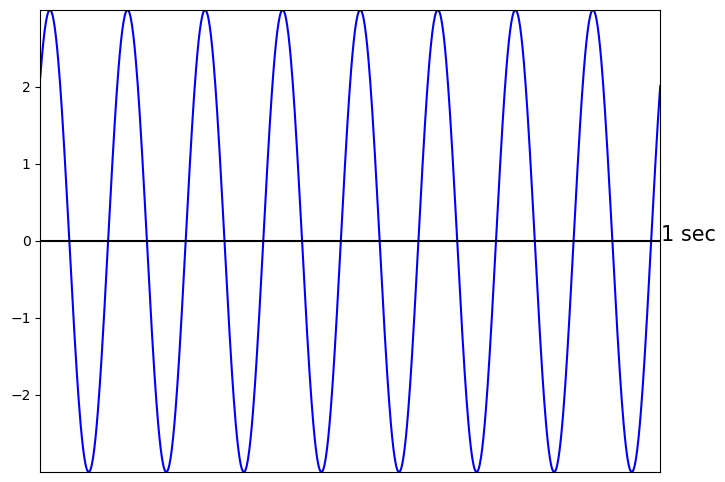

In [8]:
time = np.arange(0,1,0.001)
freq = 8
timeseries = unknownmagnitude5 * np.sin(2*np.pi * freq * time + unknownphase5) 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()